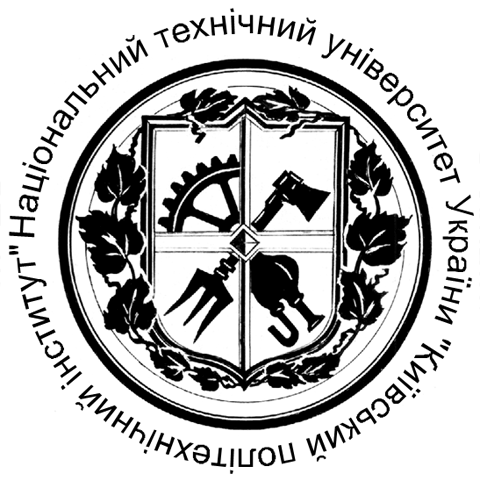

# Проект із математичного моделювання на тему:
# "Моделювання появи прострочених товарів на прикладі виробництва тортів"

Марченко Владислав КМ-82


**Область задачі:** Виробництво продукції з обмеженим терміном придатності

**Основні складові виробничого процесу:**



* кількість товару, яку потребують клієнти;
* час на виробництво певного товару;
* обмеження по часу на роботу устаткування;
* обмеження по часу терміном придатності;
* собівартість виробництва товару.



**Постановка завдання:** cкласти оптимальний план виробництва з урахуванням терміну придатності продукції, мінімузувавши витрати виробництва.

## Зміст

* Існуючі методи розв’язання задачі оптимізації виробництва
* Обрання методу розв’язання
* Алгоритм розв’язання задачі
* Теоретичні відомості щодо розв'язання задачі
* Розв'язання поставленої задачі
> * Імпортування бібліотек
> * Визначення констант
> * Опис Функції
> * Розв'язок та відображення результатів
* Висновки
* Про виконавця
* Посилання на літературу

## Існуючі методи розв’язання

Модель нашої задачі буде відноситися до класу оптимізаційних моделей. Задачі цього класу виникають при спробі оптимізувати планування та управління складними економічними системами. 

Оптимізаційну задачу можна сформулювати в загальному вигляді: 
знайти змінні x_1,x_2…x_n, що задовольняють системі нерівностей та мінімізують цільову функцію.

Цільова функція має лінійний вигляд, а тому задачі, які розглядаються в даній роботі будуть належати до задач лінійного програмування (ЗЛП).

Методи рішення ЗЛП:
*   Графічний метод;
*   Метод штучного базису;
*   Симплекс-метод.




##Обрання методу розв’язання

**Знаходження оптимального плану:** симплекс-метод.

## Алгоритм розв’язання задачі

1. Складання плану виробництва.
2. Побудова симплексної таблиці.
3. Перевірка плану на оптимальність.
4. За алгоритмом симлекс методу знайти оптимальний план.
5. Обчислення загальних витрат на виробництво продукції.

##Теоретичні відомості щодо розв'язання задачі

**Складання плану виробництва.**

Оскільки, поява простроченого товару на виробництві свідчить про проблеми в організації виробництва. Тому для поставленої задачі основою було обрано одну з класичних задач лінійного програмування - задачу про потужності:

> підприємству заданий план виробництва продукції за часом і номенклатурою: потрібно за час Т випустити N одиниць продукції. Необхідно скласти такий план роботи верстатів (тобто розподілити випуск продукції між верстатами), щоб витрати на виробництво всієї продукції були мінімальними.

Для розв'язання нашої задачі необхідно модифікувати умови задачі про потужності додавши умову про строк придатності. Будемо вважати, що підприємству достатньо не перевищувати половини строку придатності для уникнення появи простроченої продукції.


**Побудова симплексної таблиці.**

Позначимо:
* x (невідоме) – час, який буде витрачати один верстат на вироблення продукту.
* Продуктивність - кількість продукції яку можна виговити за одиницю часу.
* Собівартість - вартість виготовлення певного товару за одиницю часу.
* Замовлення - кількість товарів, яку необхідно виговити.
* Час на виробництво - час, за який товар не встигне зіпсуватися.
* Запас потужності - кількість часу, яку не можна перевищувати при роботі на обладнанні для уникнення технічних проблем.


Тоді умови задачі можна формалізувати як:

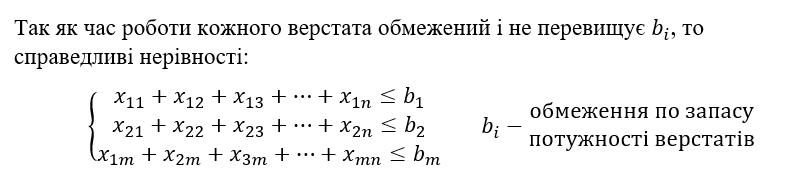
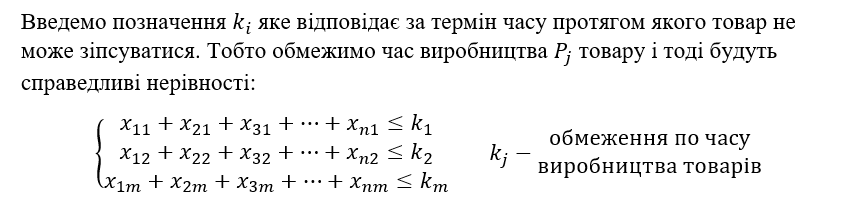
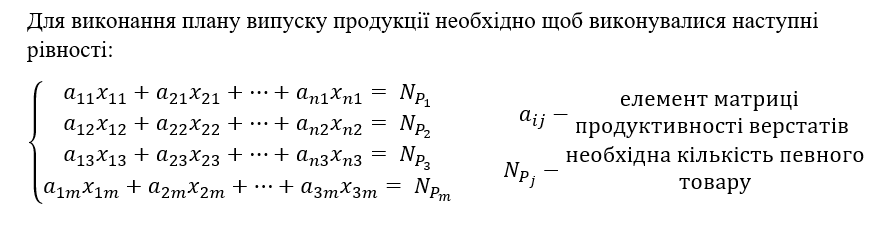

**Загальний алгоритм симплекс методу виглядає наступним чином:**

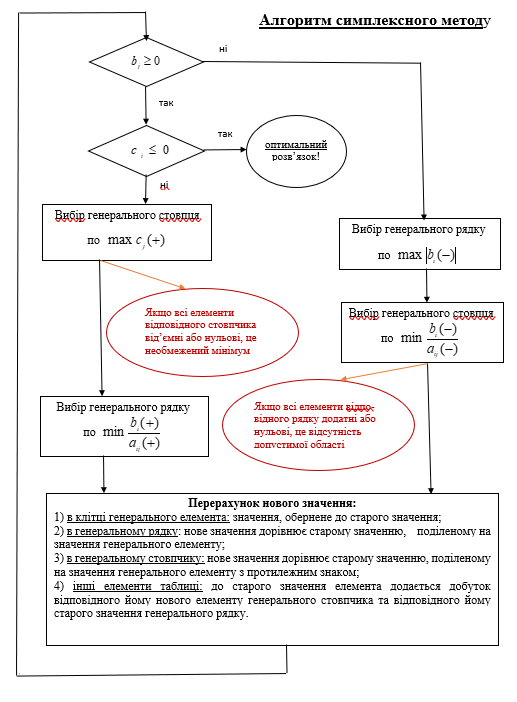

##Розв'язання поставленої задачі

Для прикладу буде взято задачу виробництва кондитерської продукції: 

Нехай кондитерський цех виробляє торти, пироги та тістечка. В цеху є два типи обладнання через що час і гроші витрачені на приготування продукту на різних машинах відрізняється.  Цех отримав замовлення на поставку певної кількості товарів. Потрібно знайти такий план виробництва замовлення, щоб вартість виробництва була мінімальною, а час виготовлення продукції та роботи на верстатах не було перевищено.

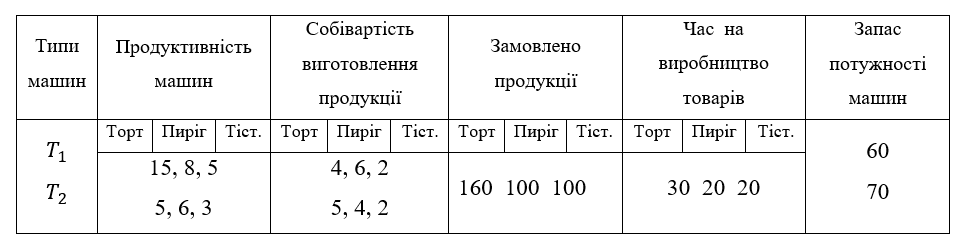

###Імпортування бібліотек

In [1]:
import numpy as np
from scipy.optimize import linprog

### Визначення констант

Матриці собівартості виготовлення та продуктивності машин

In [6]:
# Матриця собівартостей
C = np.array([
    [4, 6, 2],
    [5, 4, 2]
])
(m, n) =  C.shape
C = C.reshape((m*n,1))

# Матриця продуктивності верстатів
A = np.array([
    [15, 8, 5],
    [5, 6, 3]
])

print(f'Веткор коефіцієнтів цільової функції:\n {C.reshape((1, m*n))}')

Веткор коефіцієнтів цільової функції:
 [[4 6 2 5 4 2]]


Для умови виконання плану поставок створюємо матрицю коефіцієнтів та вектор значень обмеження.

In [7]:
A_eq = np.ones((n,m*n))
for i in range(len(np.transpose(A))):
    A_eq[i] = np.kron(np.transpose(A)[i], np.identity(n))[i]

# Вектори обмежень рівностей
b_eq = np.array([160, 100, 100])
print(f'Матриця коефіцієнтів обмежень типу рівності:\n {A_eq}')

Матриця коефіцієнтів обмежень типу рівності:
 [[15.  0.  0.  5.  0.  0.]
 [ 0.  8.  0.  0.  6.  0.]
 [ 0.  0.  5.  0.  0.  3.]]


Для обмежень по часу роботи та часу виробництва створюємо матрицю коефіцієнтів та вектор значень обмежень

In [8]:
# Обмеження по часу роботи на машинах
A_ub = np.kron(np.identity(m), np.ones((1, n)))
# Обмеження по часу виробництва продукції
A_kb = np.kron(np.ones((1, m)), np.identity(n))
A_ub = np.vstack((A_ub, A_kb))




# Вектори обмежень нерівностей
b_ub = np.array([60, 70, 30, 20, 20])
print(f'Матриця коефіцієнтів обмежень типу нерівності:\n {A_ub}')

Матриця коефіцієнтів обмежень типу нерівності:
 [[1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]]


### Опис функції

Для розв'язання задачі лінійного програмування було вирішено скористатися функцією *linprog* з модуля *optimize* бібліотеки *scipy*.

*scipy.optimize.linprog(method='simplex'):*

Linear programming: minimize a linear objective function subject to linear equality and inequality constraints using the tableau-based simplex method.

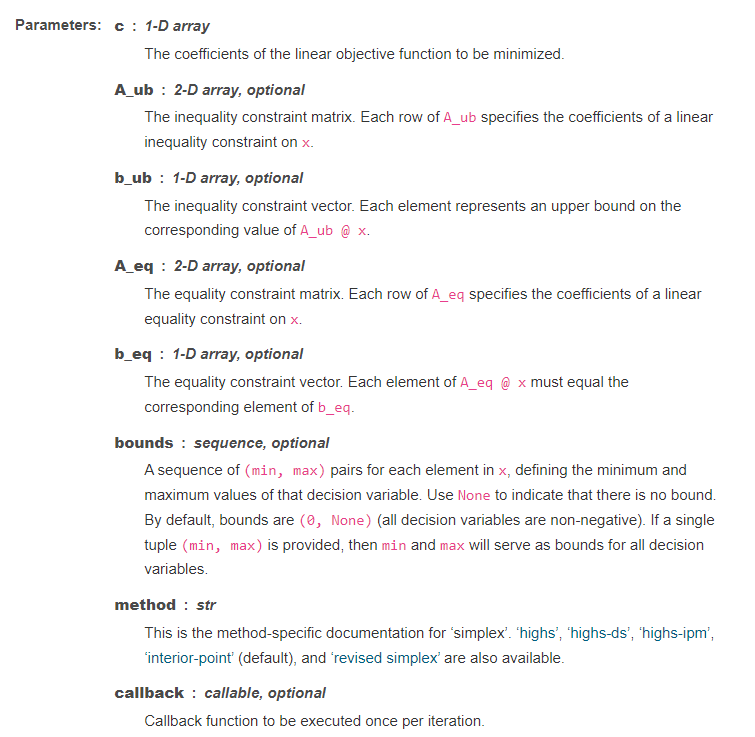

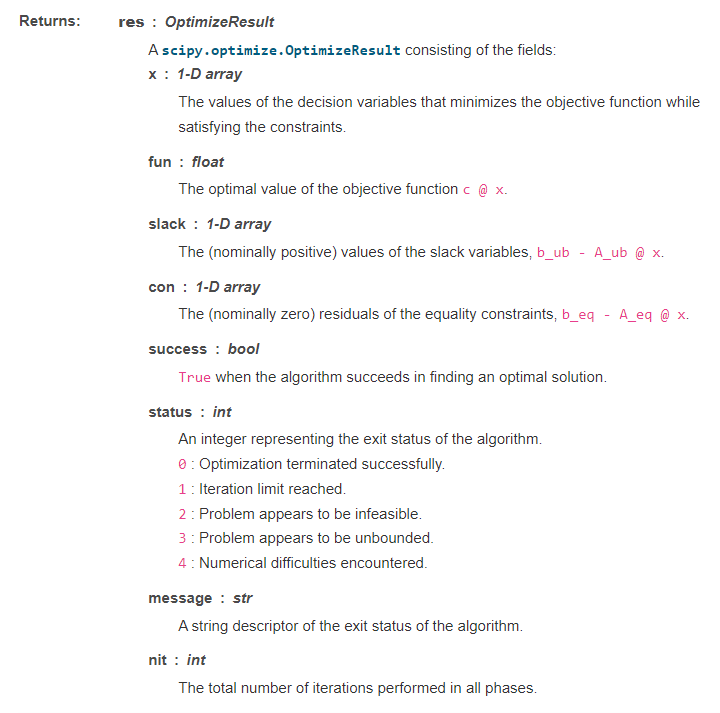

### Розв'язок та відображення результатів

In [10]:
res = linprog(C, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, method='Simplex', bounds=(0, None))

print(f"\nПовідомлення повернуте функцією: \"{res.message}\"")
print(f"Кількість ітерацій: {res.nit}")
print(f"Значення функції: {res.fun}")
print(f"Коефіцієнти цільової функції: \n", res.x)
print("X:\n", res.x.reshape((m,n), order='F'), '\n')


Повідомлення повернуте функцією: "Optimization terminated successfully."
Кількість ітерацій: 11
Значення функції: 149.33333333333331
Коефіцієнти цільової функції: 
 [10.66666667  0.         20.          0.         16.66666667  0.        ]
X:
 [[10.66666667 20.         16.66666667]
 [ 0.          0.          0.        ]] 



# Висновки

Було реалізовано програму, яка вирішує задачу лінійного програмування для знаходження оптимального плану випуску продукції з терміном придатності.

Задача була розв'язана симплекс-методом і було отримано наступний оптимальний план за яким:


> Значення функції: 149.33333333333331;

X:
 
 [10.66666667; 20.0;         16.66666667]
 
 [ 0.0  ;        0.0 ;         0.0        ]


# Про виконавця

Марченко Владислав, група КМ-82

Email: mar4vv@gmail.com

#Посилання на літературу

1.	Лавров Є. А. Математичні методи дослідження операцій / Є. А. Лавров. – Суми: Сумський державний університет, 2017. – 212 с. – (Сумський державний університет). – (ISBN 978-966-657-730-9).
2.	Карагодова О. О. Дослідження операцій в економіці / О. О. Карагодова, І. К. Федоренко, О. І. Черняк. – Київ: Знання, 2007. – 558 с. – (ІSBN 966-346-217-5).
3.	Бартіш М. Я. Дослідження операцій. Частина 1. Лінійні моделі / М. Я. Бартіш, І. М. Дудзяний. – Львів: Видавничий центр Львівського національного університету ім. І. Франка, 2007. – 168 с.
4.	Катренко А. В. Дослідження операцій / А. В. Катренко. – Львів: Магнолія Плюс, 2006. – 549 с.
5.	Іващук О. Т. Економіко-математичне моделювання / О. Т. Іващук. – Тернопіль: ТНЕУ «Економічна думка», 2008. – 704 с. – (Тернопільський національний економічний університет). – (ISBN 978-966-654-242-0).
